# Hands-on session I:  Mock catalogues, simulations vs observations - A practical pynbody tutorial
Tutors: S. Roca-Fàbrega

## Checking out the Buck et al. (2019) NIHAO-UHD simulations

In this notebook we will play a bit with a snapshot of the cosmological Milky-Way-like galaxy simulations recently published by [Buck et al. (2019)](http://adsabs.harvard.edu/abs/2019MNRAS.483.1314B), first following more or less the [pynbody tutorial](http://pynbody.github.io/pynbody/tutorials/snapshot_manipulation.html#snapshot-manipulation), then going some steps beyond. 

### Getting prepared

In order for this tutorial to run, you need to have the conda environment "Athens2022" working on your PC.

To do that you should follow the instructions in:

https://github.com/Santiastro1/Athens_School_2022/blob/main/README.md

Now you need to get the simulation file from [Tobias Buck's webpage](http://www2.mpia-hd.mpg.de/~buck/#sim_data):

Click the following link:

https://keeper.mpdl.mpg.de/d/9c96e0437bd147fabf7f/files/?p=%2Fg7.55e11.tar.gz&dl=1


This should create a "tar.gz" file in your "~\Downloads" folder. Untar it to the directory of this notebook

> cd ~\Downloads
> 
> tar -xzf g7.55e11.tar.gz ~/Athens_School_2022/HandsOnI/
> 
> mv g7.55e11 ~/Athens_School_2022/HandsOnI/

For convenience, let's create also a folder where all plots will be stored (im_NIHAO):

> mkdir ~/Athens_School_2022/HandsOnI/im_NIHAO

But now let' s check out the simulation. Run the cell below to setup the python environment:

In [1]:
import pynbody
import pynbody.plot.sph as sph
from pynbody.analysis import profile

import numpy as np
from scipy.stats import gaussian_kde
import os.path

%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.colors as colors

from astropy.table import Table

And try to load the simulation:

In [2]:
g755 = pynbody.load("~/Athens_School_2022/HandsOnI/g7.55e11/snap_1024/output/7.55e11.01024")

How big is this snapshot and what does it contain?

In [3]:
print(len(g755), "particles in total...")
print("Particle flavours: ", g755.families())
print("Cosmological parameters used:", g755.properties)

print("Properties of all particles:", g755.loadable_keys())
print("Properties of star particles:", g755.star.loadable_keys())

80417990 particles in total...
Particle flavours:  [<Family gas>, <Family dm>, <Family star>]
Cosmological parameters used: {'omegaM0': 0.3175, 'omegaL0': 0.6825, 'h': 0.6710431436818002, 'boxsize': Unit("8.94e+04 kpc a"), 'a': 0.9999999999999842, 'time': Unit("1.41e+01 s kpc km**-1")}
Properties of all particles: ['phi', 'OxMassFrac', 'HeII', 'vel', 'massform', 'HI', 'timeform', 'HeI', 'FeMassFrac', 'iord', 'eps', 'pos', 'igasorder', 'mass']
Properties of star particles: ['phi', 'OxMassFrac', 'HeII', 'tform', 'iord', 'eps', 'igasorder', 'mass', 'vel', 'massform', 'HI', 'timeform', 'HeI', 'FeMassFrac', 'pos', 'metals']


Get some basic properties of the file:

In [4]:
g755.star.derivable_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'smooth',
 'rho',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform']

What units are we dealing with?

In [5]:
g755.star['FeMassFrac'].units, g755.star['metals'].units, g755.star['tform'].units

(Unit("1.00e+00"), NoUnit(), Unit("4.31e+01 s kpc km**-1"))

In [6]:
g755.star['age'].in_units('Gyr')

SimArray([1.36297156e+01, 1.36280299e+01, 1.36246585e+01, ...,
          1.20624922e-05, 1.20624922e-05, 1.20624922e-05], 'Gyr')

What is the unique identifier of a particle?

In [11]:
np.unique(g755.star['iord'])

SimArray([75702911, 75702912, 75702913, ..., 80985808, 80985809, 80985810],
         dtype=int32)

How many particles do we have?

In [12]:
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(g755.gas),len(g755.dark),len(g755.star)))

ngas = 3.584208e+07, ndark = 3.929301e+07, nstar = 5.282900e+06



Where is the main halo of the snapshot?

In [4]:
mainhalo = g755.halos()[1]
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(mainhalo.gas),len(mainhalo.dark),len(mainhalo.star)))

ngas = 2.618668e+06, ndark = 4.980547e+06, nstar = 4.773743e+06



Center the analysis on the big spiral galaxy

In [5]:
pynbody.analysis.angmom.faceon(mainhalo)
mainhalo.physical_units()

Plot the integrated gas density in a face-on map

<IPython.core.display.Javascript object>


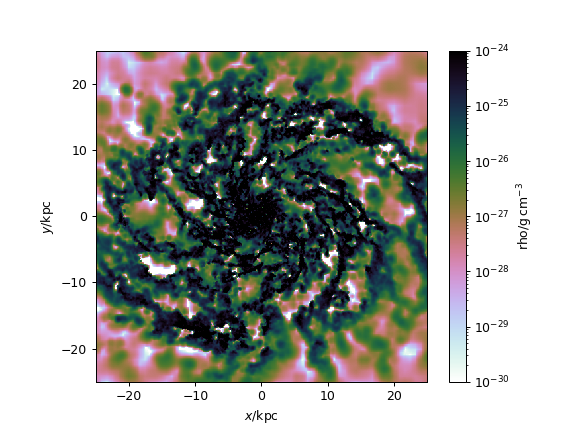

In [11]:
plt.figure()
#create a simple slice of gas density
sph.image(mainhalo.gas, qty="rho", units="g cm^-3", width="50 kpc", cmap="cubehelix_r", vmin=1e-30, vmax=1e-24)
plt.savefig("./im_NIHAO/g755_gasdensity_xy.png")
plt.show()

Now select only the star particles and create a false-colour image of the galaxy:

<IPython.core.display.Javascript object>


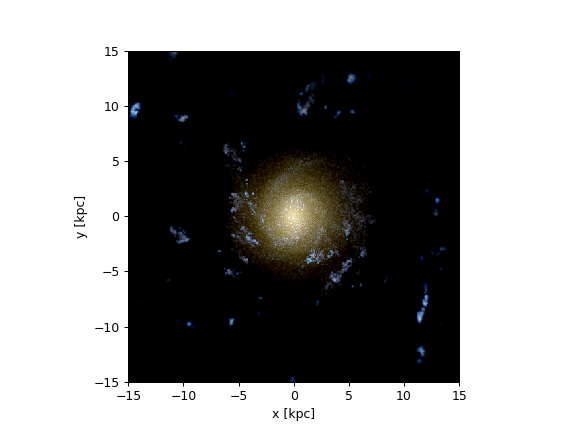

In [12]:
#create an image using the default bands (i, v, u)
plt.figure()
pynbody.plot.stars.render(mainhalo, width="30 kpc")
#plt.scatter(mainhalo.stars['x'], mainhalo.stars['y'], marker='.', s=1, alpha=0.005)
plt.savefig("./im_NIHAO/g755_starlight_xy.png")
plt.show()

Create a stellar density map:

<IPython.core.display.Javascript object>


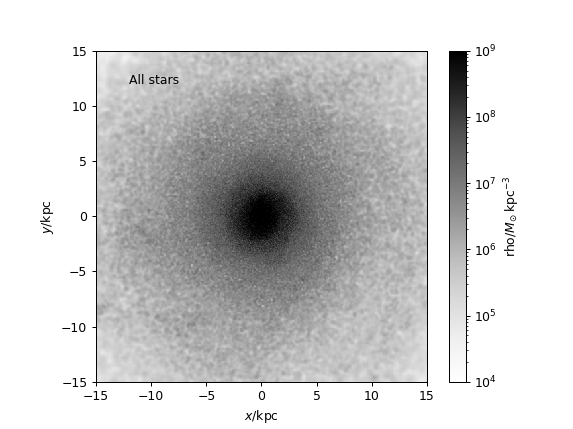

In [13]:
plt.figure()
sph.image(mainhalo.star, qty="rho", units="Msol kpc^-3", width="30 kpc", cmap="Greys", vmin=1e4, vmax=1e9)
plt.text(-12, 12, "All stars")
plt.savefig("./im_NIHAO/g755_stardensity_xy.png")

And now let's save part of the disc stars data for later, to create Gaia DR2 RVS-sample-like mock observations:

In [14]:
stars = mainhalo.star
# Assuming the Sun is at X=-8.0 kpc (default value for snapdragons), 
# we can cut out a 3kpc sphere around the Sun:
stars = stars[ ((stars['x'] + 8.)**2.+stars['y']**2.+stars['z']**2. < 3.**2.)  ]

startable = Table( [stars['x'].in_units('kpc'), stars['y'].in_units('kpc'), stars['z'].in_units('kpc'),
                    stars['vx'].in_units('km s^-1'), stars['vy'].in_units('km s^-1'), stars['vz'].in_units('km s^-1'),
                    10.**(stars['feh'])*0.0152, stars['age'].in_units('Gyr'), 
                    stars['mass'].in_units('Msol')], 
                    names=('x', 'y', 'z', 'vx', 'vy', 'vz', 'feh', 'age', 'mass') )

writefile = "./g7.55e11/snap_1024/nihao_stars_3kpc_sphere.dat"
startable.write(writefile, format="ascii.fast_no_header", overwrite=True)


Draw the rotation curve of this galaxy (total & separate for each component):

/home/hpc/comas/fanders/.local/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


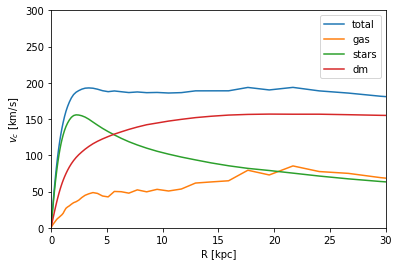

In [18]:
# create a profile object for the stars
p = pynbody.analysis.profile.Profile(mainhalo,min=.01,max=300,type='log',ndim=3)
pg = pynbody.analysis.profile.Profile(mainhalo.g,min=.01,max=300,type='log',ndim=3)
ps = pynbody.analysis.profile.Profile(mainhalo.s,min=.01,max=300,type='log',ndim=3)
pd = pynbody.analysis.profile.Profile(mainhalo.d,min=.01,max=300,type='log',ndim=3)

#print(p.keys())
# make the plot
plt.figure()
plt.plot(p['rbins'],p['v_circ'],label='total')
plt.plot(pg['rbins'],pg['v_circ'],label='gas')
plt.plot(ps['rbins'],ps['v_circ'],label='stars')
plt.plot(pd['rbins'],pd['v_circ'],label='dm')
plt.axis([0,30,0,300])

plt.xlabel('R [kpc]')
plt.ylabel(r'$v_c$ [km/s]')
plt.legend()
plt.savefig("./im_NIHAO/g755_rotationcurve.png")
plt.show()

Now try to reproduce the [$\alpha$/Fe] plot for the solar vicinity from [Buck (2019)](https://ui.adsabs.harvard.edu/abs/2019arXiv190909162B/abstract) (e.g. Fig. 1, third panel):

In [19]:
stars = mainhalo.star
sn    = stars[(stars['x']**2.+stars['y']**2.<81.) & (stars['x']**2.+stars['y']**2.>49.) & (stars['z']**2.<9.)]

In [20]:
# Use KDE to prettify the picture
data = np.vstack([sn['feh'], sn['ofe']])
kde = gaussian_kde(data)

xrange=(-1.5,0.5)
yrange=(-0.1,0.5)
grid=200
# evaluate on a regular grid
xgrid = np.linspace(xrange[0], xrange[1], grid)
ygrid = np.linspace(yrange[0], yrange[1], grid)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

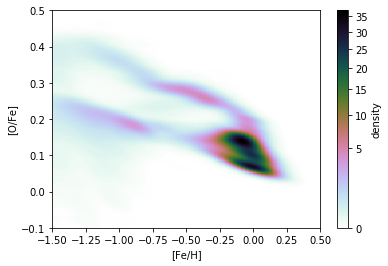

In [21]:
# Plot the result as an image
f  = plt.figure()
ax = f.add_subplot(111)
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[xrange[0], xrange[1],yrange[0], yrange[1]],
           cmap='cubehelix_r',norm=colors.PowerNorm(gamma=1. / 2.) )#LogNorm(vmin=0.02, vmax=50))
cb = plt.colorbar()
cb.set_label("density")
ax.set_xlabel(r"[Fe/H]")
ax.set_ylabel(r"[O/Fe]")
#plt.scatter(sn['feh'], sn['ofe'], marker='.', s=1, alpha=0.05)
plt.axis([xrange[0], xrange[1],yrange[0], yrange[1]])
plt.savefig("./im_NIHAO/g755_ofe_sn.png")
plt.show()

## Investigating the radial [Fe/H] gradient in the simulated disc

In [25]:
disk    = stars[(stars['x']**2.+stars['y']**2.< 225.) & (stars['z']**2.<9.)]
data    = np.vstack([np.sqrt(disk['x']**2. + disk['y']**2.), disk['feh']])
kde     = gaussian_kde(data)

xrange= (0,15)
yrange= (-1.,0.5)
grid  = 100
# evaluate on a regular grid
xgrid = np.linspace(xrange[0], xrange[1], grid)
ygrid = np.linspace(yrange[0], yrange[1], grid)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
# Save the KDE evaluation of this profile to disk - since this can take a while, we save the results as a numpy array
profilepath = 'g755_feh_r_profile.npy'
if os.path.exists(profilepath):
    Z1 = np.load(profilepath)
else:
    Z1 = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    np.save(profilepath, Z1)


<IPython.core.display.Javascript object>


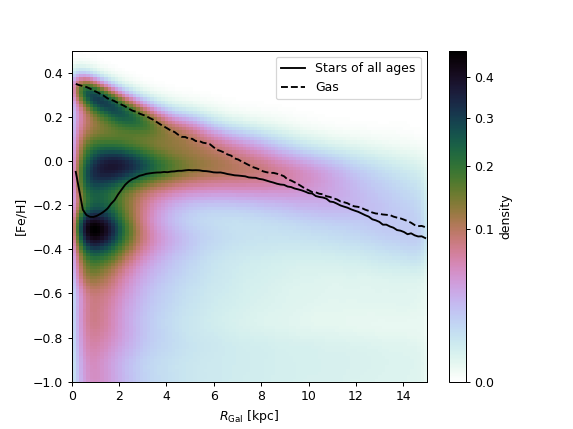

In [29]:
f1 = plt.figure()
ax = f1.add_subplot(111)
plt.imshow(Z1.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[xrange[0], xrange[1],yrange[0], yrange[1]],
           cmap='cubehelix_r',norm=colors.PowerNorm(gamma=1. / 2.) )#LogNorm(vmin=0.02, vmax=50))

# Overplot also the running median of the stars and the gas
ps_quant = profile.QuantileProfile(disk, min = '0.1 kpc', max = '15 kpc')
plt.plot(ps_quant['rbins'], ps_quant['feh'][:,1], 'k', label="Stars of all ages")
pg_quant = profile.QuantileProfile(mainhalo.g, min = '0.1 kpc', max = '15 kpc')
plt.plot(pg_quant['rbins'], pg_quant['feh'][:,1], '--k', label="Gas")
ax.legend(loc="upper right")

cb = plt.colorbar()
cb.set_label("density")
ax.set_ylabel(r"[Fe/H]")
ax.set_xlabel(r"$R_{\rm Gal}$ [kpc]")
plt.savefig("./im_NIHAO/g755_metallicitygradient.png")
plt.show()